In [152]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [153]:
# set the address of the file on your disk
pathname = (r"C:\MyFiles\Dropbox\Teaching\Advanced_GIS_for_Environmental_Planning\Data\NYC\CensusTracts\Census_Tracts_with_Data_cleaned.csv")

In [154]:
df = pd.read_csv(pathname)
df.sample(2)

,GISJOIN,Population2000,NH_White_2000,NH_Black_2000,Asian_2000,Hispanic_2000,Other_2000,Pct_NH_White_2000,Pct_NH_Black_2000,Pct_NH_Asian_2000,...,RatioHsngUnitsChange0610_2000,Borough_Name,HeatVulIndex,pctRentChange,DOB_Perm90_99,DOB_Perm2000_07,DOB_Perm_08_15,DOB_Perm16_21,DOB_PrmCnt,SideWalkCafeCount
277,G3600610008300,3477.0,1396.0,427.0,238.0,1356.0,60.0,40.149554,12.280702,6.844981,...,1.072848,Manhattan,2,13.732813,8,20,483,168,679,16
851,G3600470030800,1691.0,1202.0,5.0,308.0,142.0,34.0,71.0822,0.295683,18.214075,...,1.066852,Brooklyn,3,20.748563,2,67,118,39,226,0


In [155]:
# Let's get a subset of columns. 
dfSub = df[['GISJOIN', 'Population2000', 'Pct_NH_White_2000', 'Pct_NH_Black_2000', 'Pct_NH_Asian_2000', 'Pct_Hispanic_2000', 'Pct_Other_2000', 'Pct_EthMinority_2000', 'HousingUnits_2000',
             'Pct_VacantUnits_2000',  'MEDHHINC_2000', 'Pct_Age25Up_College_2000', 'Pct_RenterUnits_2000', 'MedianRent_2000', 'MedianHomeValue_2000', 
            'Population_0610', 'MedianHouseholdIncome_0610', 'HousingUnits_0610', 'MedianGrossRent_0610', 'MedianHouseValue_0610', 'Pct_BachelorOver25_0610', 'Pct_Renters_0610', 
            'Pct_EthnicMinority_0610', 'Pct_HispanicOrLatino_0610', 'Pct_BlackNonHispanic_0610','Population_1216', 'MedianHsHldIncome_1216', 'HousingUnits_1216','MedGrossRentt_1216',
            'MedHseValue_1216', 'Pct_BachelorOver25_1216', 'Pct_RenterOccupied_1216', 'Pct_EthnicMinority_1216', 'Pct_HispanicOrLatino_1216', 'Pct_BlackNonHispanic_1216', 
            'Pct_VacantHousing_0610', 'Pct_VacantHousing_1216', 'PopulationDensity2000', 'PopulationDensity0610', 'PopulationDensity1216',  'RatioHsngUnitsChange1216_0610', 
            'RatioHsngUnitsChange0610_2000', 'Borough_Name', 'HeatVulIndex', 'pctRentChange', 'DOB_Perm90_99', 'DOB_Perm2000_07', 'DOB_Perm_08_15', 'DOB_Perm16_21', 'DOB_PrmCnt', 
            'SideWalkCafeCount']]

In [156]:
dfSub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GISJOIN                        2147 non-null   object 
 1   Population2000                 2147 non-null   float64
 2   Pct_NH_White_2000              2147 non-null   object 
 3   Pct_NH_Black_2000              2147 non-null   object 
 4   Pct_NH_Asian_2000              2147 non-null   object 
 5   Pct_Hispanic_2000              2147 non-null   object 
 6   Pct_Other_2000                 2147 non-null   object 
 7   Pct_EthMinority_2000           2147 non-null   object 
 8   HousingUnits_2000              2147 non-null   float64
 9   Pct_VacantUnits_2000           2147 non-null   object 
 10  MEDHHINC_2000                  2147 non-null   float64
 11  Pct_Age25Up_College_2000       2147 non-null   float64
 12  Pct_RenterUnits_2000           2147 non-null   f

In [100]:
dfSub.sample(2)

,GISJOIN,Population2000,Pct_NH_White_2000,Pct_NH_Black_2000,Pct_NH_Asian_2000,Pct_Hispanic_2000,Pct_Other_2000,Pct_EthMinority_2000,HousingUnits_2000,Pct_VacantUnits_2000,...,RatioHsngUnitsChange0610_2000,Borough_Name,HeatVulIndex,pctRentChange,DOB_Perm90_99,DOB_Perm2000_07,DOB_Perm_08_15,DOB_Perm16_21,DOB_PrmCnt,SideWalkCafeCount
398,G3600470032700,3868.0,2.45605,87.978283,0.98242,7.755946,0.827301,97.54395,1539.0,3.378817,...,0.920728,Brooklyn,4,43.115603,0,6,113,60,179,0
1424,G3600810033900,3703.0,18.147448,4.860924,17.256279,57.953011,1.782339,81.852552,1240.0,1.693548,...,0.994355,Queens,2,10.453106,4,19,73,43,139,0


In [157]:
dfSub.columns

Index(['GISJOIN', 'Population2000', 'Pct_NH_White_2000', 'Pct_NH_Black_2000',
       'Pct_NH_Asian_2000', 'Pct_Hispanic_2000', 'Pct_Other_2000',
       'Pct_EthMinority_2000', 'HousingUnits_2000', 'Pct_VacantUnits_2000',
       'MEDHHINC_2000', 'Pct_Age25Up_College_2000', 'Pct_RenterUnits_2000',
       'MedianRent_2000', 'MedianHomeValue_2000', 'Population_0610',
       'MedianHouseholdIncome_0610', 'HousingUnits_0610',
       'MedianGrossRent_0610', 'MedianHouseValue_0610',
       'Pct_BachelorOver25_0610', 'Pct_Renters_0610',
       'Pct_EthnicMinority_0610', 'Pct_HispanicOrLatino_0610',
       'Pct_BlackNonHispanic_0610', 'Population_1216',
       'MedianHsHldIncome_1216', 'HousingUnits_1216', 'MedGrossRentt_1216',
       'MedHseValue_1216', 'Pct_BachelorOver25_1216',
       'Pct_RenterOccupied_1216', 'Pct_EthnicMinority_1216',
       'Pct_HispanicOrLatino_1216', 'Pct_BlackNonHispanic_1216',
       'Pct_VacantHousing_0610', 'Pct_VacantHousing_1216',
       'PopulationDensity2000', '

In [158]:
# list of columns to convert numerical variables
lstCols = ['Population2000', 'Pct_NH_White_2000',
           'Pct_NH_Black_2000', 'Pct_NH_Asian_2000', 'Pct_Hispanic_2000',
           'Pct_Other_2000', 'Pct_EthMinority_2000', 'HousingUnits_2000',
           'Pct_VacantUnits_2000', 'MEDHHINC_2000', 'Pct_Age25Up_College_2000',
           'Pct_RenterUnits_2000', 'MedianRent_2000', 'MedianHomeValue_2000',
           'Population_0610', 'MedianHouseholdIncome_0610', 'HousingUnits_0610',
           'MedianGrossRent_0610', 'MedianHouseValue_0610',
           'Pct_BachelorOver25_0610', 'Pct_Renters_0610',
           'Pct_EthnicMinority_0610', 'Pct_HispanicOrLatino_0610',
           'Pct_BlackNonHispanic_0610', 'Population_1216',
           'MedianHsHldIncome_1216', 'HousingUnits_1216', 'MedGrossRentt_1216',
           'MedHseValue_1216', 'Pct_BachelorOver25_1216',
           'Pct_RenterOccupied_1216', 'Pct_EthnicMinority_1216',
           'Pct_HispanicOrLatino_1216', 'Pct_BlackNonHispanic_1216',
           'Pct_VacantHousing_0610', 'Pct_VacantHousing_1216',
           'PopulationDensity2000', 'PopulationDensity0610',
           'PopulationDensity1216', 'RatioHsngUnitsChange1216_0610',
           'RatioHsngUnitsChange0610_2000', 'HeatVulIndex', 'pctRentChange',
           'DOB_Perm90_99', 'DOB_Perm2000_07', 'DOB_Perm_08_15', 'DOB_Perm16_21',
           'DOB_PrmCnt',  'SideWalkCafeCount'
           ]

In [159]:
# Convert the columns to numerica variables. 
for item in lstCols:
    dfSub[item] = pd.to_numeric(dfSub[item], errors='coerce')
# dfSub.replace([np.inf, -np.inf,0], np.nan)
# # drop nan values
# dfSub.dropna(inplace=True)

C:\Users\Mehdi\.conda\envs\UrbanDataAnalysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
dfSub.sample(2)

,GISJOIN,Population2000,Pct_NH_White_2000,Pct_NH_Black_2000,Pct_NH_Asian_2000,Pct_Hispanic_2000,Pct_Other_2000,Pct_EthMinority_2000,HousingUnits_2000,Pct_VacantUnits_2000,...,RatioHsngUnitsChange0610_2000,Borough_Name,HeatVulIndex,pctRentChange,DOB_Perm90_99,DOB_Perm2000_07,DOB_Perm_08_15,DOB_Perm16_21,DOB_PrmCnt,SideWalkCafeCount
363,G3600610013000,4622.0,90.437040,1.492860,3.634790,3.916054,0.519256,9.562960,2976.0,19.455645,...,0.982863,Manhattan,1,3.695031,98.0,23.0,1926.0,634.0,2681.0,6
1848,G3600050021800,6648.0,5.851384,27.933213,4.241877,61.116125,0.857401,94.148616,2410.0,5.767635,...,1.000000,Bronx,4,40.771637,1.0,47.0,85.0,73.0,206.0,0


In [161]:
len(dfSub)

2147

In [162]:
dfSub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GISJOIN                        2147 non-null   object 
 1   Population2000                 2147 non-null   float64
 2   Pct_NH_White_2000              2140 non-null   float64
 3   Pct_NH_Black_2000              2140 non-null   float64
 4   Pct_NH_Asian_2000              2140 non-null   float64
 5   Pct_Hispanic_2000              2140 non-null   float64
 6   Pct_Other_2000                 2140 non-null   float64
 7   Pct_EthMinority_2000           2140 non-null   float64
 8   HousingUnits_2000              2147 non-null   float64
 9   Pct_VacantUnits_2000           2132 non-null   float64
 10  MEDHHINC_2000                  2147 non-null   float64
 11  Pct_Age25Up_College_2000       2147 non-null   float64
 12  Pct_RenterUnits_2000           2147 non-null   f

In [163]:
dfSub['Borough_Name'].unique()

array(['Staten Island', 'Manhattan', 'Bronx', 'Brooklyn', 'Queens'],
      dtype=object)

In [164]:
# let's get the Brooklyn rows only
dfSub2 =dfSub.loc[dfSub['Borough_Name']=='Brooklyn']

In [165]:
len(dfSub2)

753

In [166]:
# these are the columns for facgtor analysis. 
df_cols_factor = dfSub2[['GISJOIN','MedianHsHldIncome_1216', 'HousingUnits_1216', 'MedGrossRentt_1216',
                       'MedHseValue_1216', 'Pct_BachelorOver25_1216', 'Pct_EthnicMinority_1216',
                        'RatioHsngUnitsChange1216_0610','RatioHsngUnitsChange0610_2000','pctRentChange', 
                        'DOB_PrmCnt',  'SideWalkCafeCount'
                       ]]

In [167]:
len(df_cols_factor)

753

In [169]:
# fill the nan values with the average of columns
df_cols_factor = (df_cols_factor.fillna(df_cols_factor.mean())).copy()

In [170]:
df_cols_factor.sample(2)

,GISJOIN,MedianHsHldIncome_1216,HousingUnits_1216,MedGrossRentt_1216,MedHseValue_1216,Pct_BachelorOver25_1216,Pct_EthnicMinority_1216,RatioHsngUnitsChange1216_0610,RatioHsngUnitsChange0610_2000,pctRentChange,DOB_PrmCnt,SideWalkCafeCount
841,G3600470029700,52594.0,1793,1509.0,894900.0,39.60703,90.56694,1.038818,1.041013,70.768970,218.0,0
730,G3600470006000,71172.0,1181,1429.0,853700.0,42.21845,37.11137,0.935816,1.070399,45.883314,180.0,6


In [171]:
len(df_cols_factor)

753

In [172]:
# Let's keep the unique id in a column
dfGISJOIN = df_cols_factor[['GISJOIN']]

In [173]:
len(dfGISJOIN)

753

In [174]:
# then let's drop the unique id from the df for the factor analysis. Since this is not a numeric variable
df_cols_factor.drop(['GISJOIN'],axis=1,inplace=True)

In [175]:
# In this Bartlett ’s test, the p-value is 0. The test was statistically significant,
# indicating that the observed correlation matrix is not an identity matrix
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_cols_factor)
chi_square_value, p_value

(3594.6064944149007, 0.0)

In [177]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
#It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion 
# of variance among all the observed variable. Lower proportion id more suitable for factor analysis. 
#KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_cols_factor)
kmo_model

0.7255319786358482

In [178]:
# Let's start the factor analysis with creating a factor object.
fa = FactorAnalyzer()
# fiting the factor object with the columns (variables)
fa.fit(df_cols_factor)
# we will get the eigen values and vectors. Eigen values are important for choosing number of factors
eigen_values, vectors = fa.get_eigenvalues()

In [179]:
eigen_values

array([4.07341739, 1.56373653, 1.32080413, 0.92968946, 0.69840162,
       0.65538222, 0.57393419, 0.52731406, 0.35187678, 0.19288584,
       0.11255778])

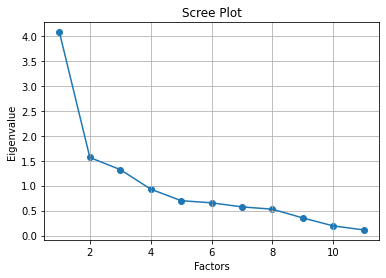

In [180]:
# this block plots the eigen values and factors. Numbers greater than one can be consiered for including in the list of factors. 
# Also pay attention to the plots trend. 
plt.scatter(range(1,df_cols_factor.shape[1]+1),eigen_values)
plt.plot(range(1,df_cols_factor.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [181]:
fa = FactorAnalyzer()
# now set the number of factors here; also rotation of the vectors.
fa.set_params(n_factors=4, rotation='varimax')
fa.fit(df_cols_factor)
# this will report the value of factors for each variable.
loadings = fa.loadings_

In [182]:
df_cols_factor.columns

Index(['MedianHsHldIncome_1216', 'HousingUnits_1216', 'MedGrossRentt_1216',
       'MedHseValue_1216', 'Pct_BachelorOver25_1216',
       'Pct_EthnicMinority_1216', 'RatioHsngUnitsChange1216_0610',
       'RatioHsngUnitsChange0610_2000', 'pctRentChange', 'DOB_PrmCnt',
       'SideWalkCafeCount'],
      dtype='object')

In [183]:
ar_loadings = fa.loadings_

In [184]:
# let's see how factors can be associated to variables 
loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2','factor 3','factor 4'], index=df_cols_factor.columns)
loadings['selected_factor']=(np.array(ar_loadings).argmax(axis=1))+1
loadings.sort_values('selected_factor')
# loadings

,Factor 1,Factor 2,factor 3,factor 4,selected_factor
MedianHsHldIncome_1216,0.935788,0.248980,0.194340,-0.030650,1
MedGrossRentt_1216,0.626592,0.359339,0.522050,-0.041476,1
Pct_BachelorOver25_1216,0.661216,0.543245,0.166697,0.184413,1
SideWalkCafeCount,0.327283,0.255373,0.238635,0.301386,1
MedHseValue_1216,0.298756,0.482268,0.111272,0.228756,2
Pct_EthnicMinority_1216,-0.214802,-0.794579,0.058795,0.024911,3
RatioHsngUnitsChange1216_0610,0.097063,0.007976,0.227560,0.000157,3
RatioHsngUnitsChange0610_2000,0.037610,-0.067130,0.442769,0.148788,3
pctRentChange,0.120656,0.182860,0.860260,0.085898,3
HousingUnits_1216,-0.066044,-0.048447,-0.000304,0.712518,4


In [185]:
fa.get_factor_variance()

(array([2.00681455, 1.53078792, 1.47233306, 1.23082245]),
 array([0.18243769, 0.13916254, 0.13384846, 0.11189295]),
 array([0.18243769, 0.32160022, 0.45544868, 0.56734163]))

In [37]:
fa.get_communalities()

array([0.74658008, 0.3962945 , 0.75077507, 0.32626818, 0.76324525,
       0.27441365, 0.02926783, 0.0846137 , 0.28017734, 0.76469605,
       0.32587781])

In [186]:
## you can get the values of each row for each factor using transforming them
#fa.transform(df_cols_factor)

array([[ 0.16219757,  0.1160141 , -0.40733113,  1.95592637],
       [-0.36229684,  0.48415645,  0.15991225,  0.86266114],
       [ 0.18496316, -0.11173815,  0.41475226,  0.39504409],
       ...,
       [ 1.91238395,  0.38146209, -0.98861028, -0.85360024],
       [-0.61811161,  2.91869519, -0.75123225, -1.04362947],
       [-0.39361853,  1.38293098, -0.25710995, -1.25172056]])

In [187]:
# convert the factors to a dataframe
outputTable = pd.DataFrame(fa.transform(df_cols_factor),columns=['factor_1','factor_2','factor 3','factor 4'])

In [188]:
outputTable.sample(3)

,factor_1,factor_2,factor 3,factor 4
223,-1.062428,0.957456,0.507184,0.582415
325,2.567845,-0.170989,-1.791744,-1.128619
306,-0.869114,-0.309183,0.473268,0.547935


In [189]:
# let's add the unique id field. This will help to map the values
outputTable['GISJOIN']=dfGISJOIN['GISJOIN'].values

In [202]:
outputTable.sample(2)

,factor_1,factor_2,factor 3,factor 4,GISJOIN,cluster
357,-0.039533,-0.383719,0.894961,-0.333326,G3600470008000,0
587,-0.514208,1.347448,-0.272910,-0.618962,G3600470047400,1


In [203]:
# now you can save the results in a table.
outputTable.to_csv(r"C:\MyFiles\Dropbox\Teaching\Advanced_GIS_for_Environmental_Planning\Data\NYC\CensusTracts\Census_Tracts_with_Data_two_factor_brooklyn3.csv")

In [192]:
X=outputTable[['factor_1','factor_2','factor 3','factor 4']]

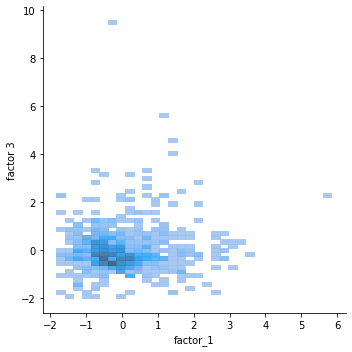

In [194]:
sns.displot(data=outputTable,x ='factor_1',y ='factor 3',alpha=0.9)

In [195]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

KMeans(n_clusters=3)

In [196]:
outputTable['cluster'] = k_means.labels_

In [197]:
len(k_means.labels_)

753

In [198]:
outputTable

,factor_1,factor_2,factor 3,factor 4,GISJOIN,cluster
0,0.162198,0.116014,-0.407331,1.955926,G3600470031500,0
1,-0.362297,0.484156,0.159912,0.862661,G3600470031701,1
2,0.184963,-0.111738,0.414752,0.395044,G3600470031702,0
3,-0.247721,-0.014986,-0.457322,0.016021,G3600470031900,1
4,-0.493576,-0.388551,0.217928,0.688370,G3600470032100,0
...,...,...,...,...,...,...
748,0.426638,-0.999399,-0.585179,-0.353834,G3600470074000,0
749,1.137883,-0.586831,-0.885342,-0.771919,G3600470074200,0
750,1.912384,0.381462,-0.988610,-0.853600,G3600470074400,1
751,-0.618112,2.918695,-0.751232,-1.043629,G3600810091800,1


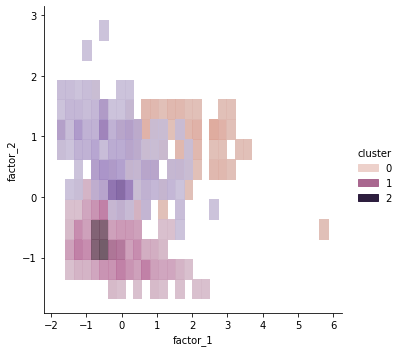

In [137]:
sns.displot(data=outputTable,x ='factor_1',y ='factor_2',hue='cluster',alpha=0.9)

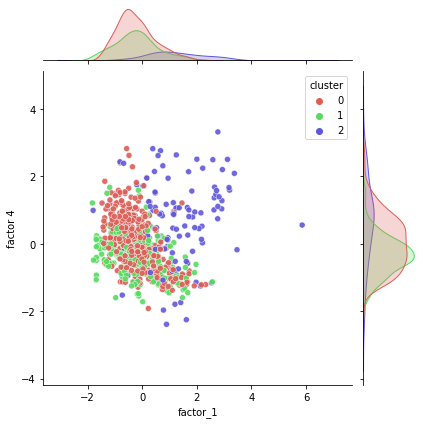

In [201]:
sns.jointplot(data=outputTable,x ='factor_1',y ='factor 4',hue='cluster',alpha=0.9,palette=sns.color_palette("hls", 3))

In [146]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)


In [147]:
outputTable['cluster_new']=labels

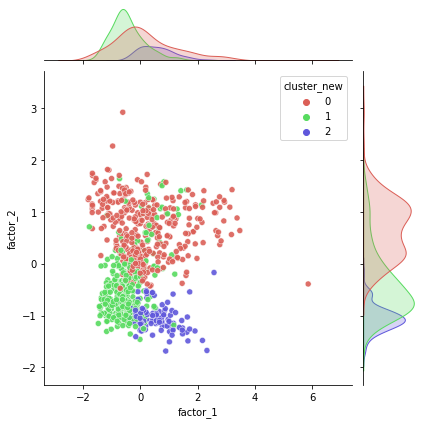

In [149]:
sns.jointplot(data=outputTable,x ='factor_1',y ='factor_2',hue='cluster_new',alpha=0.9,palette=sns.color_palette("hls", 3))

In [151]:
outputTable.to_csv(r"C:\MyFiles\Dropbox\Teaching\Advanced_GIS_for_Environmental_Planning\Data\NYC\CensusTracts\Census_Tracts_with_Data_two_factor_brooklyn3_withClusters3.csv")